# Calculating weight patterns from NN

Celia R. M.

## Utilities

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce

In [2]:
# Drawing the heatmap
plt.set_cmap('viridis')

def heatmap_matrix(m,i=-1,ax=None): # just a heatmap
    if ax == None:
        _, ax = plt.subplots(1,1)
    set_ticks(ax,i,np.array(m).shape[0])
    if i != -1:
        set_title(ax,i)
        img = ax.imshow(m, aspect='auto')
    else:
        img = ax.imshow(m)
    return ax,img

def set_ticks(ax,i,n):
    if n == 1:
        ax.set_yticks([])
    else:
        ax.set_yticks(np.arange(0,n,1))
        ax.set_yticklabels(np.arange(i,i+n,1))
    ax.set_xticks(np.arange(0,32,2))

def set_title(ax,i):
    ax.set_title('Pesos capa oculta neuronas del '+str(i)+' al '+str(i+19))
    ax.set_xlabel('Entrada de la red')
    ax.set_ylabel('Neurona (Reconstrucción)')

<Figure size 432x288 with 0 Axes>

In [3]:
# Adding neurons

# bitwise operations for lists of {0,1}
def op_and(x,y):
    return np.array([ a&b for a,b in zip(x,y) ])
def op_xor(x,y):
    return np.array([ a^b for a,b in zip(x,y) ])
def op_not(x):
    return np.array([ 1^(a) for a in x ])

# where neuron patterns and formulas are stored
ns = np.array([[0]*32 for _ in range(200)])
fs = {}

def add_neuron(k,and_index,xors_index):
    fs[k] = [and_index,xors_index]
    ands = reduce(op_and, [c[a] for a in and_index], [1]*32)
    xors = reduce(op_xor, [c[x] for x in xors_index], [0]*32)
    ns[k] = op_and(ands,xors) - op_and(ands,op_not(xors))
    heatmap_matrix([ns[k]])
    plt.savefig('img/rows/n{}.png'.format(k),bbox_inches='tight',dpi=300)

In [4]:
# basic functions
basic_c = np.array([
    np.array(([0]*16+[1]*16)),
    np.array(([0]*8+[1]*8)*2),
    np.array(([0]*4+[1]*4)*4),
    np.array(([0]*2+[1]*2)*8),
    np.array([0,1]*16)
])

def neg(i):
    return i+5

# basic functions and negations
c = [basic_c[i] for i in range(5)] + [op_not(basic_c[i]) for i in range(5)]

## Neurons

### Neurons from 0 to 19

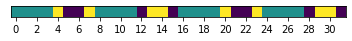

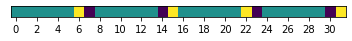

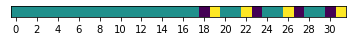

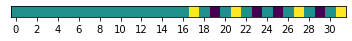

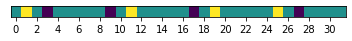

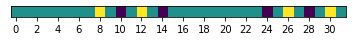

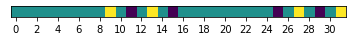

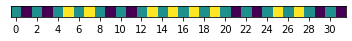

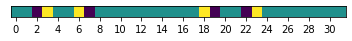

In [5]:
add_neuron(1,[2],[neg(1),3,4])
add_neuron(3,[2,3],[neg(1),4])
add_neuron(5,[0,3],[1,2,4])
add_neuron(7,[0,4],[neg(1),3])
add_neuron(12,[neg(2),4],[neg(0),1,3])
add_neuron(13,[1,neg(4)],[neg(0),3])
add_neuron(14,[1,4],[neg(0),3])
add_neuron(15,[4],[0,2])
add_neuron(19,[neg(1),3],[0,2,4])

### Neurons from 20 to 39

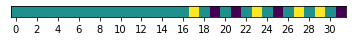

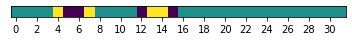

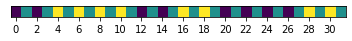

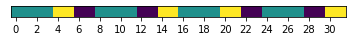

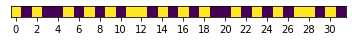

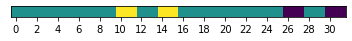

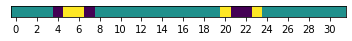

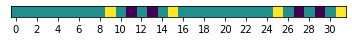

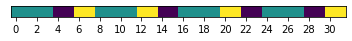

In [6]:
add_neuron(22,[0,4],[neg(1),2,3])
add_neuron(23,[neg(0),2],[neg(1),3,4])
add_neuron(24,[neg(4)],[0,1,2])
add_neuron(28,[2],[neg(1),3])
add_neuron(29,[],[neg(1),2,4])
add_neuron(30,[1,3],[neg(0)])
add_neuron(32,[neg(1),2],[0,3,4])
add_neuron(34,[1,4],[neg(2),3])
add_neuron(38,[2],[0,1,3])

### Neurons from 40 to 59

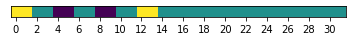

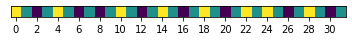

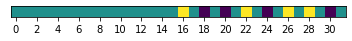

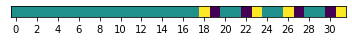

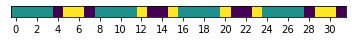

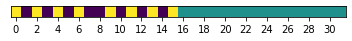

In [7]:
add_neuron(50,[neg(0),neg(3)],[neg(1),2])
add_neuron(51,[neg(4)],[neg(0),1,3])
add_neuron(52,[0,neg(4)],[neg(1),2,3])
add_neuron(53,[0,3],[neg(2),4])
add_neuron(55,[2],[0,1,3,4])
add_neuron(59,[neg(0)],[neg(1),4])

### Neurons from 60 to 79

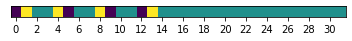

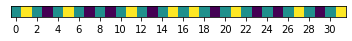

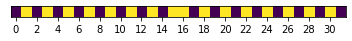

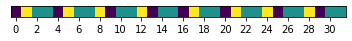

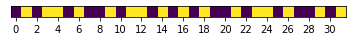

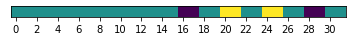

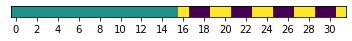

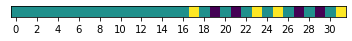

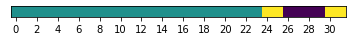

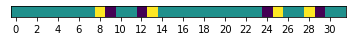

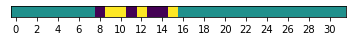

In [8]:
add_neuron(61,[neg(0),neg(3)],[1,2,4])
add_neuron(63,[4],[neg(1),3])
add_neuron(64,[],[0,4])
add_neuron(66,[neg(3)],[1,4])
add_neuron(67,[],[0,2,4])
add_neuron(68,[0,neg(3)],[1,2])
add_neuron(70,[0],[neg(3),4])
add_neuron(73,[0,4],[neg(2),3])
add_neuron(75,[0,1],[neg(2),3])
add_neuron(76,[1,neg(3)],[neg(0),2,4])
add_neuron(79,[neg(0),1],[2,3,4])

### Neurons from 80 to 99

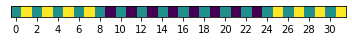

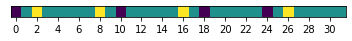

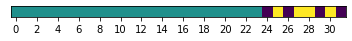

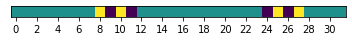

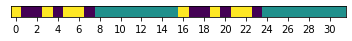

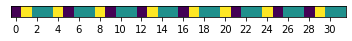

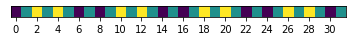

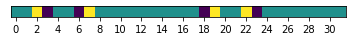

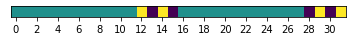

In [9]:
add_neuron(82,[4],[neg(0),1])
add_neuron(83,[neg(2),neg(4)],[0,1,3])
add_neuron(84,[0,1],[2,4])
add_neuron(88,[1,neg(2)],[neg(0),4])
add_neuron(91,[neg(1)],[neg(2),3,4])
add_neuron(94,[neg(3)],[1,2,4])
add_neuron(96,[neg(4)],[2,3])
add_neuron(98,[neg(1),3],[neg(0),2,4])
add_neuron(99,[1,2],[neg(0),4])

### Neurons from 100 to 119

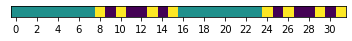

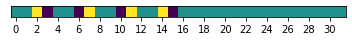

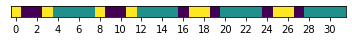

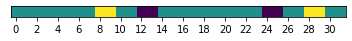

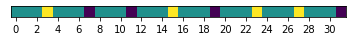

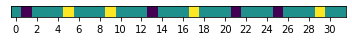

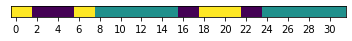

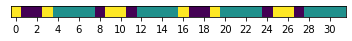

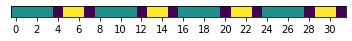

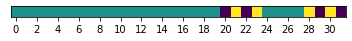

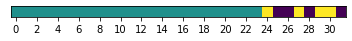

In [10]:
add_neuron(100,[1],[neg(2),4])
add_neuron(101,[neg(0),3],[neg(1),2,4])
add_neuron(102,[neg(2)],[neg(0),3,4])
add_neuron(104,[1,neg(3)],[neg(0),2])
add_neuron(105,[3,4],[neg(0),1,2])
add_neuron(108,[neg(3),4],[0,1,2])
add_neuron(110,[neg(1)],[neg(0),2,3])
add_neuron(111,[neg(2)],[neg(1),3,4])
add_neuron(116,[2],[3,4])
add_neuron(117,[0,2],[1,4])
add_neuron(118,[0,1],[neg(2),3,4])

### Neurons from 120 to 139

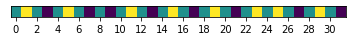

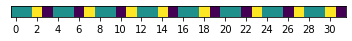

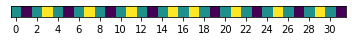

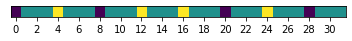

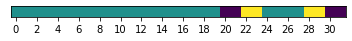

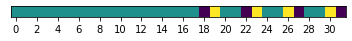

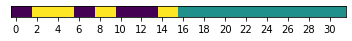

In [11]:
add_neuron(120,[4],[neg(0),1,3])
add_neuron(121,[3],[neg(1),2,4])
add_neuron(123,[4],[0,3])
add_neuron(128,[neg(3),neg(4)],[0,2])
add_neuron(131,[0,2],[1,3])
add_neuron(133,[0,3],[1,4])
add_neuron(137,[neg(0)],[1,2,3])

### Neurons from 140 to 159

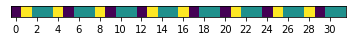

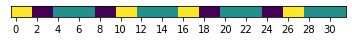

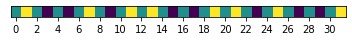

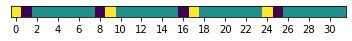

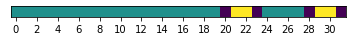

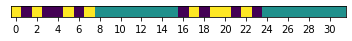

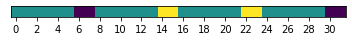

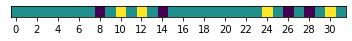

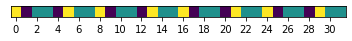

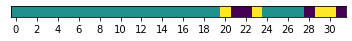

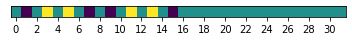

In [12]:
add_neuron(141,[neg(3)],[0,1,2,4])
add_neuron(142,[neg(2)],[neg(1),3])
add_neuron(144,[4],[neg(0),1,2,3])
add_neuron(147,[neg(2),neg(3)],[neg(0),1,4])
add_neuron(148,[0,2],[3,4])
add_neuron(150,[neg(1)],[neg(0),2,4])
add_neuron(151,[2,3],[0,1])
add_neuron(154,[1,neg(4)],[0,2,3])
add_neuron(157,[neg(3)],[neg(2),4])
add_neuron(158,[0,2],[neg(1),3,4])
add_neuron(159,[neg(0),4],[2,3])

### Neurons from 160 to 179

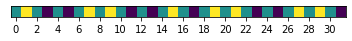

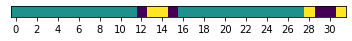

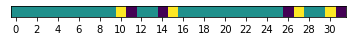

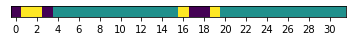

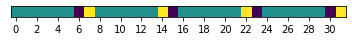

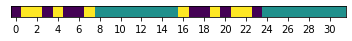

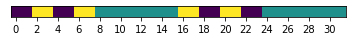

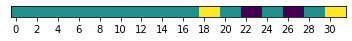

In [13]:
add_neuron(161,[4],[neg(0),2,3])
add_neuron(163,[1,2],[0,3,4])
add_neuron(164,[1,3],[neg(0),2,4])
add_neuron(166,[neg(1),neg(2)],[0,3,4])
add_neuron(168,[2,3],[0,1,4])
add_neuron(172,[neg(1)],[0,2,3,4])
add_neuron(173,[neg(1)],[0,3])
add_neuron(176,[0,3],[neg(1),2])

### Neurons from 180 to 199

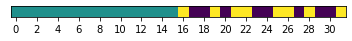

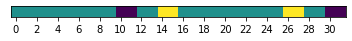

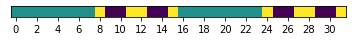

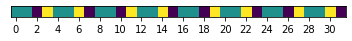

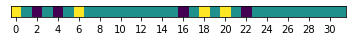

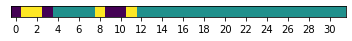

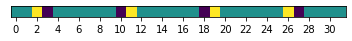

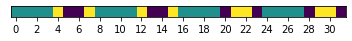

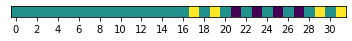

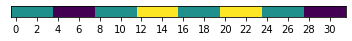

In [14]:
add_neuron(182,[0],[neg(1),2,3,4])
add_neuron(183,[1,3],[0,2])
add_neuron(184,[1],[neg(3),4])
add_neuron(186,[3],[2,4])
add_neuron(187,[neg(1),neg(4)],[neg(0),2,3])
add_neuron(188,[neg(0),neg(2)],[1,3,4])
add_neuron(194,[neg(2),3],[neg(0),1,4])
add_neuron(195,[2],[neg(0),3,4])
add_neuron(198,[0,4],[neg(1),2])
add_neuron(199,[2],[0,1])

## Weight matrix

In [15]:
#import real dataframe
df = pd.read_csv('pesos.csv')
df.iloc[181][31] /= 2 # this cell is super low and disturbs the visuals

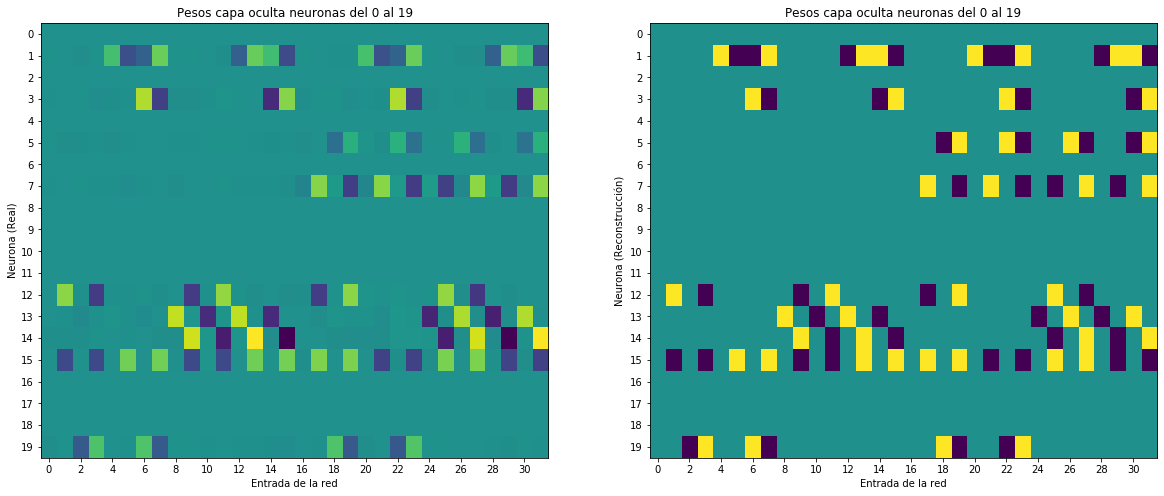

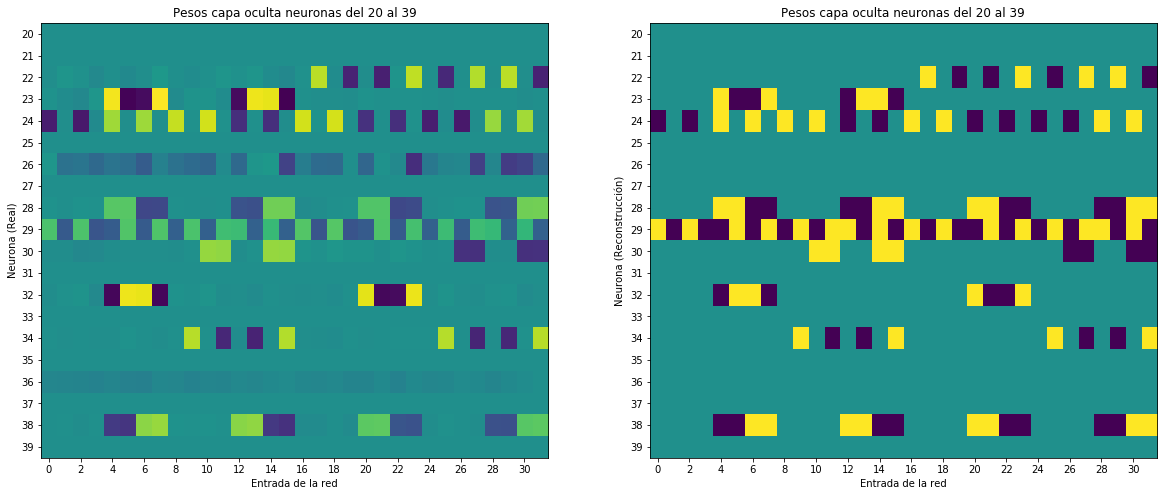

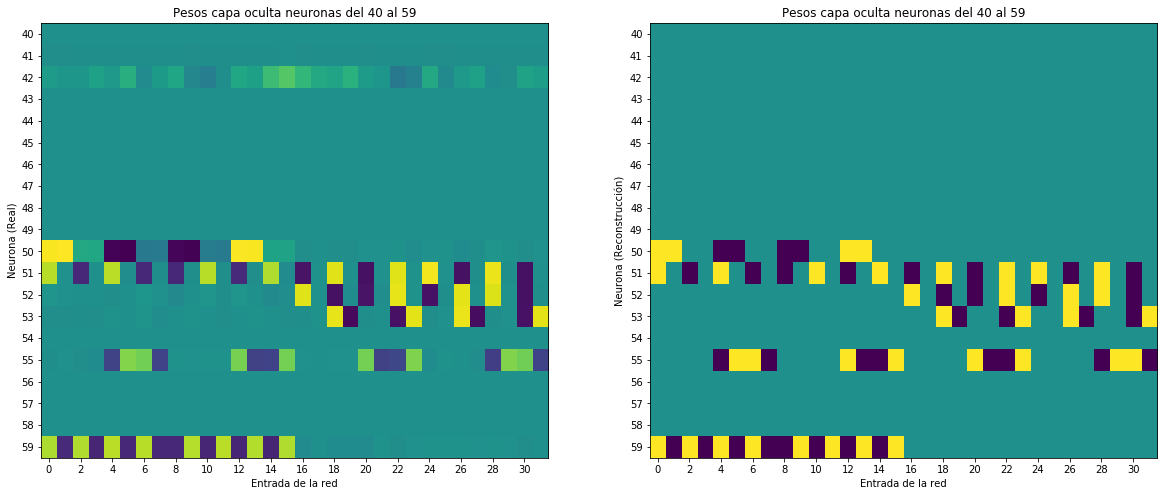

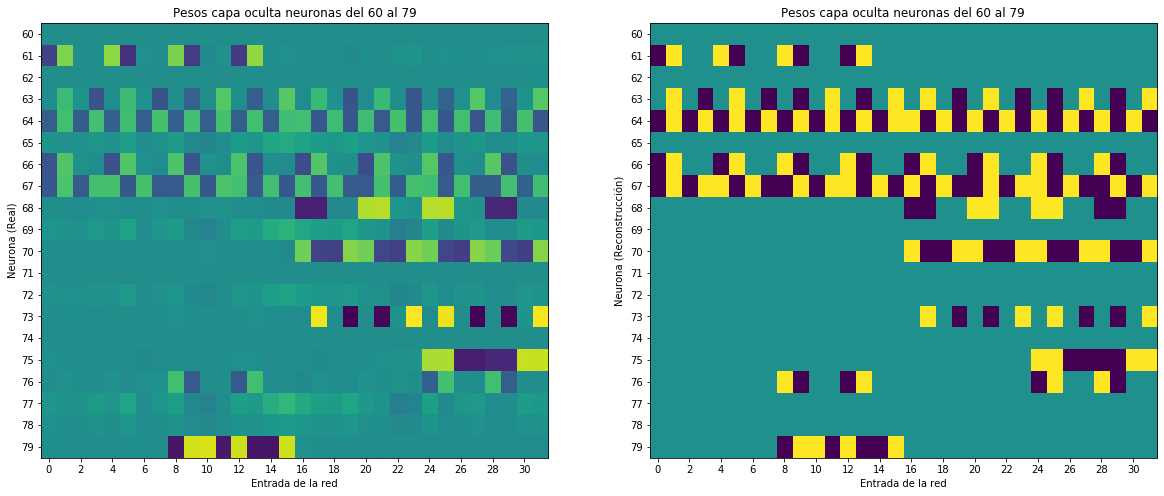

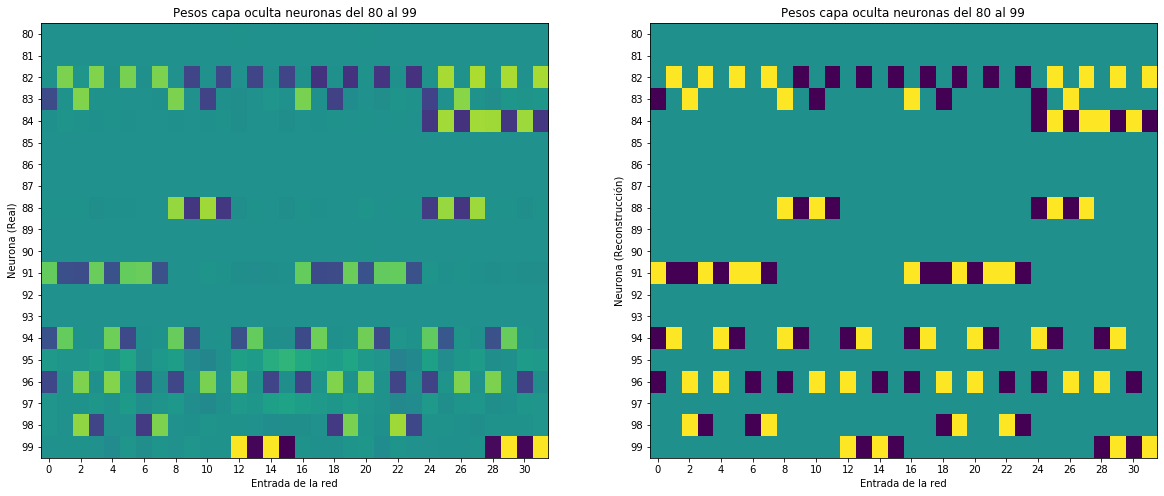

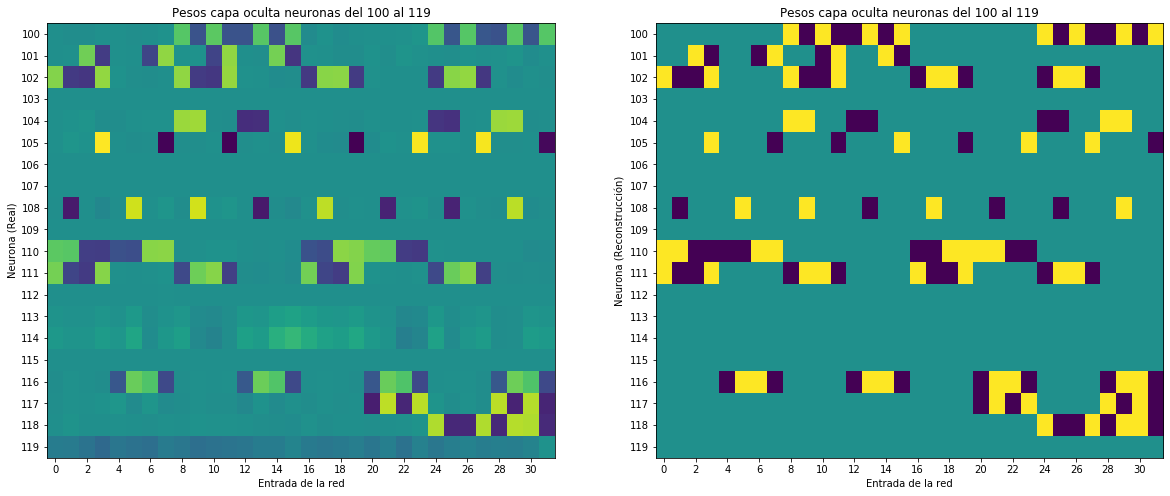

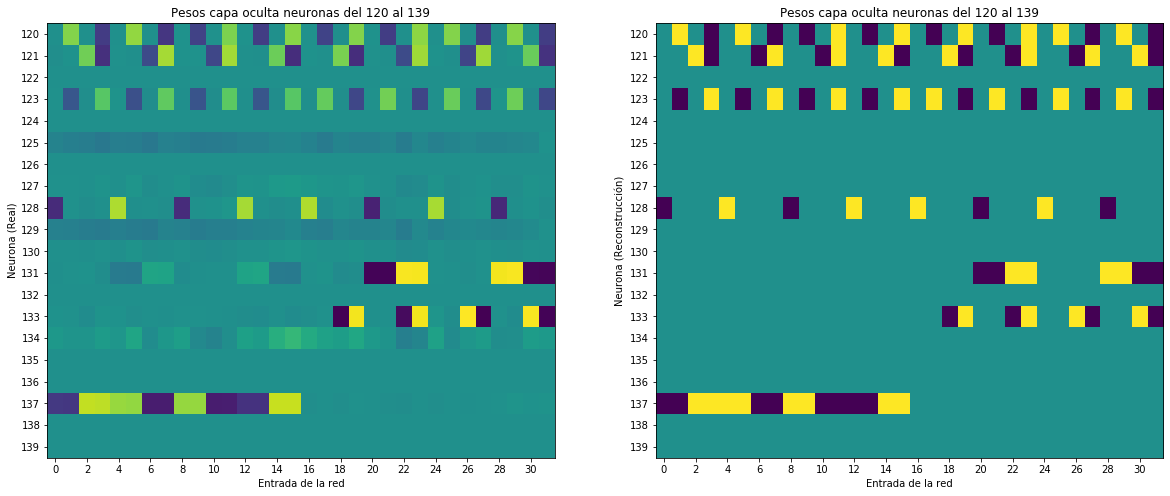

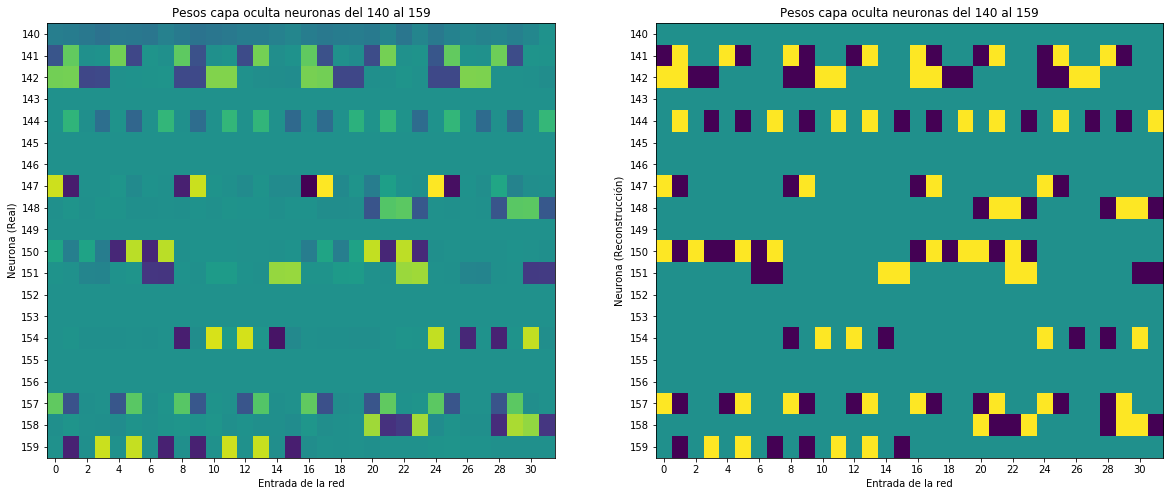

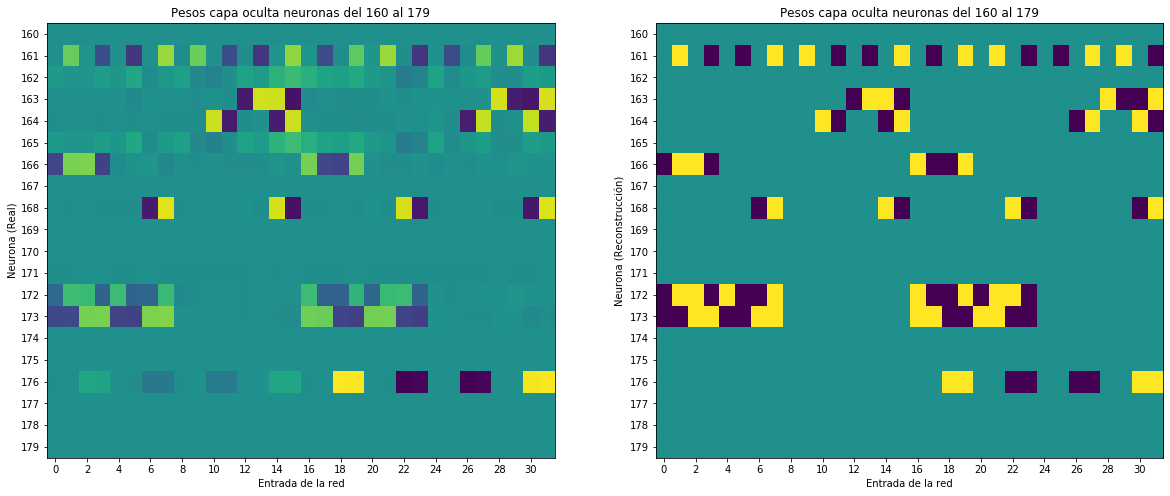

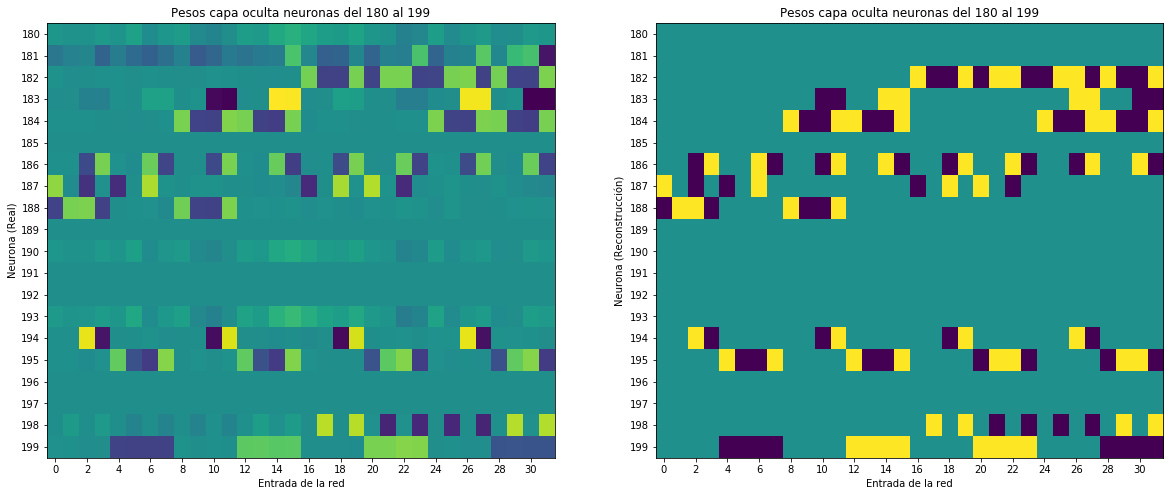

In [16]:
for i in range(0,200,20):
    fig = plt.figure(figsize=(20,8))
    ax = fig.subplots(1,2)
    heatmap_matrix(df[i:i+20],i,ax=ax[0])
    ax[0].set_ylabel('Neurona (Real)')
    heatmap_matrix(ns[i:i+20],i,ax=ax[1])
    plt.savefig('img/matrix/m{}.png'.format(i),bbox_inches='tight',dpi=300)

In [24]:
#save formulas
formulas = pd.DataFrame(fs).transpose()
formulas.columns = ['ands','xors']
formulas.to_csv('xpattern_real.csv',sep='&')

## Examples for paper

In [18]:
# functions to visualize rows as Karnaugh maps
def row_to_K0(x): #just binary
    matrix = []
    for i in range(4):
        row = []
        for j in range(8):
            row += [x[i*8+j]]
        matrix += [row]
    return matrix

def row_to_K1(x):
    matrix = row_to_K0(x)
    matrix[2],matrix[3] = matrix[3],matrix[2]
    for i in range(4):
        matrix[i][2],matrix[i][3] = matrix[i][3],matrix[i][2]
        matrix[i][4],matrix[i][5],matrix[i][6],matrix[i][7]\
        = matrix[i][6],matrix[i][7],matrix[i][5],matrix[i][4]
    return matrix
    
def row_to_K2(x):
    matrix = row_to_K0(x)
    matrix[1],matrix[2],matrix[3] = matrix[2],matrix[3],matrix[1]
    for i in range(4):
        matrix[i][1],matrix[i][2],matrix[i][3],matrix[i][4]\
        , matrix[i][5],matrix[i][6],matrix[i][7] =\
        matrix[i][4],matrix[i][6],matrix[i][2],matrix[i][3]\
        , matrix[i][7],matrix[i][5],matrix[i][1]
    return matrix

def plot_3_karnaugh(x): # plots the 3 maps from above
    f, ax = plt.subplots(1,3)
    ax[0].imshow(row_to_K0(x))
    ax[1].imshow(row_to_K1(x))
    ax[2].imshow(row_to_K2(x))

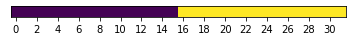

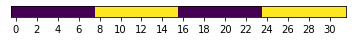

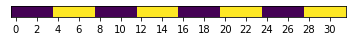

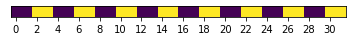

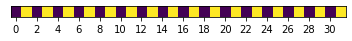

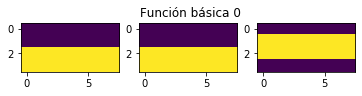

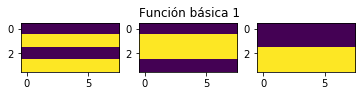

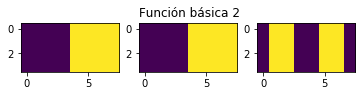

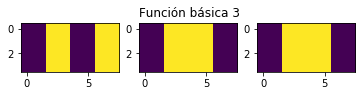

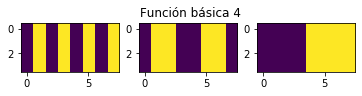

In [19]:
# basic functions
for i in range(5):
    heatmap_matrix([c[i]])
    plt.savefig('img/examples/c{}.png'.format(i),bbox_inches='tight',dpi=300)

for i in range(5):
    plot_3_karnaugh(c[i])
    plt.title('Función básica '+str(i), x=-0.68)
    plt.savefig('img/examples/k{}.png'.format(i),bbox_inches='tight',dpi=300)

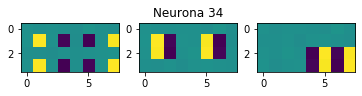

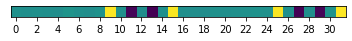

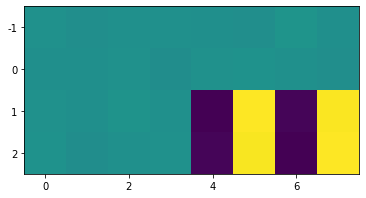

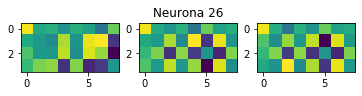

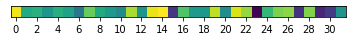

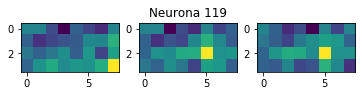

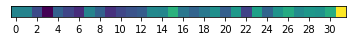

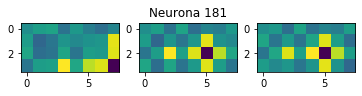

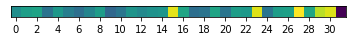

In [20]:
def try_row(num):
    plot_3_karnaugh(df.iloc[num])
    plt.title('Neurona '+str(num), x=-0.7)
    plt.savefig('img/examples/kn{}.png'.format(num),bbox_inches='tight',dpi=300)
    heatmap_matrix([df.iloc[num]])

try_row(34)
heatmap_matrix(row_to_K2(df.iloc[34]))

try_row(26)
try_row(119)
try_row(181)

<ipython-input-18-e3b269b92963>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1,3)


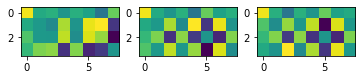

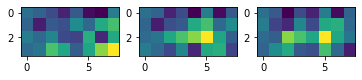

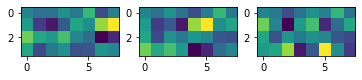

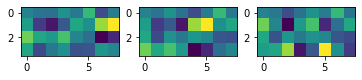

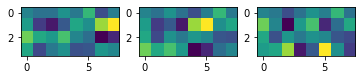

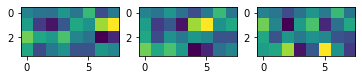

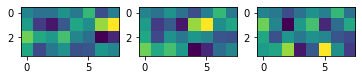

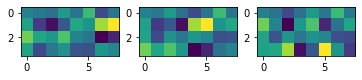

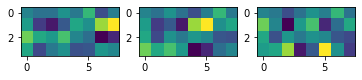

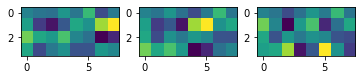

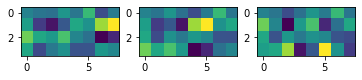

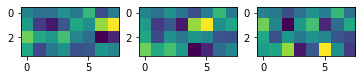

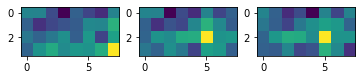

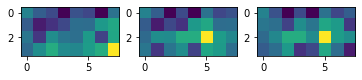

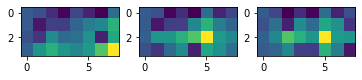

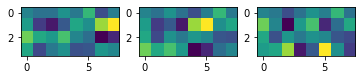

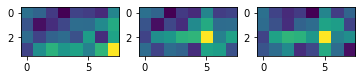

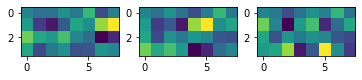

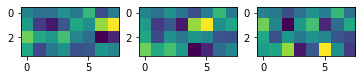

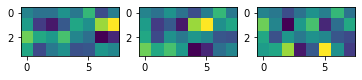

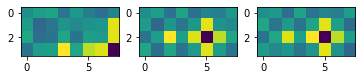

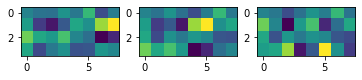

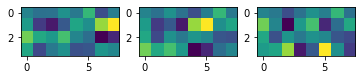

In [21]:
plot_3_karnaugh(df.iloc[26])
plot_3_karnaugh(df.iloc[36])
plot_3_karnaugh(df.iloc[42])
plot_3_karnaugh(df.iloc[65])
plot_3_karnaugh(df.iloc[69])
plot_3_karnaugh(df.iloc[72])
plot_3_karnaugh(df.iloc[77])
plot_3_karnaugh(df.iloc[78])
plot_3_karnaugh(df.iloc[95])
plot_3_karnaugh(df.iloc[97])
plot_3_karnaugh(df.iloc[113])
plot_3_karnaugh(df.iloc[114])
plot_3_karnaugh(df.iloc[119])
plot_3_karnaugh(df.iloc[125])
plot_3_karnaugh(df.iloc[129])
plot_3_karnaugh(df.iloc[134])
plot_3_karnaugh(df.iloc[140])
plot_3_karnaugh(df.iloc[162])
plot_3_karnaugh(df.iloc[165])
plot_3_karnaugh(df.iloc[180])
plot_3_karnaugh(df.iloc[181])
plot_3_karnaugh(df.iloc[190])
plot_3_karnaugh(df.iloc[193])